<a href="https://colab.research.google.com/github/matanaaa14/mechineLearning_task2/blob/main/mechine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def read_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # First two columns are x and y coordinates
    y = data[:, 2]   # Third column is the label
    return X, y

# Assuming your dataset is in 'data.txt'
file_path = '/content/two_circle.txt'
X, y = read_data(file_path)


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Perceptron update rule
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


In [ ]:
# Create the Perceptron instance and train it
perceptron = Perceptron(learning_rate=0.1, epochs=1000)
perceptron.fit(X, y)


Accuracy: 100.00%


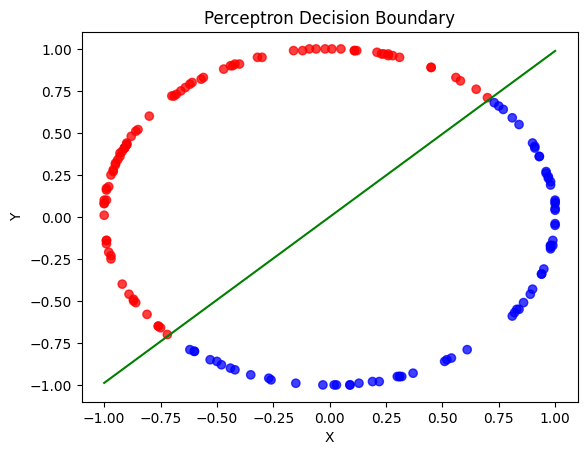

In [ ]:
# Make predictions
predictions = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', alpha=0.75)
plt.title("Perceptron Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")

# Plot the line (decision boundary)
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]
plt.plot(x_values, y_values, color='green')
plt.show()


Test Accuracy: 93.33%
Train Accuracy: 100.00%


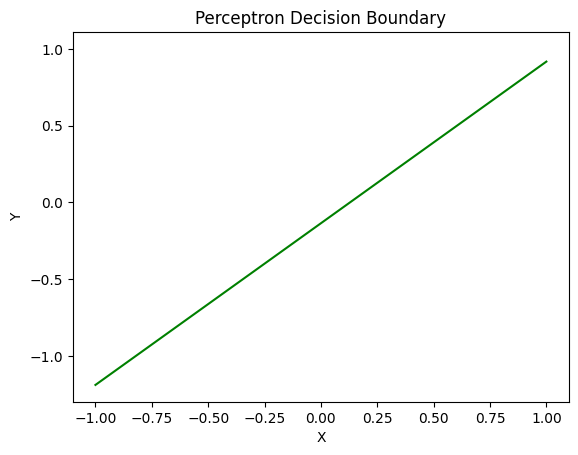

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read data from text file
def read_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # First two columns are x and y coordinates
    y = data[:, 2]   # Third column is the label
    return X, y

# Define Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Perceptron update rule
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Main script
file_path = '/content/two_circle.txt'
X, y = read_data(file_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Perceptron instance and train it on the training data
perceptron = Perceptron(learning_rate=0.1, epochs=1000)
perceptron.fit(X_train, y_train)

# Make predictions on the testing set
predictions = perceptron.predict(X_test)

# Calculate accuracy on the testing set
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: Calculate accuracy on the training set for comparison
train_predictions = perceptron.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Plot the decision boundary using the entire dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.)
plt.title("Perceptron Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")

# Plot the line (decision boundary)
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]
plt.plot(x_values, y_values, color='green')
plt.show()


Test Accuracy: 93.33%
Train Accuracy: 100.00%
Final direction vector (weights): [-0.778  0.739]
Final direction vector (bias): 0.1
Number of mistakes made by the algorithm: 89
Margin achieved by the final direction vector: 0.0013513067517545553


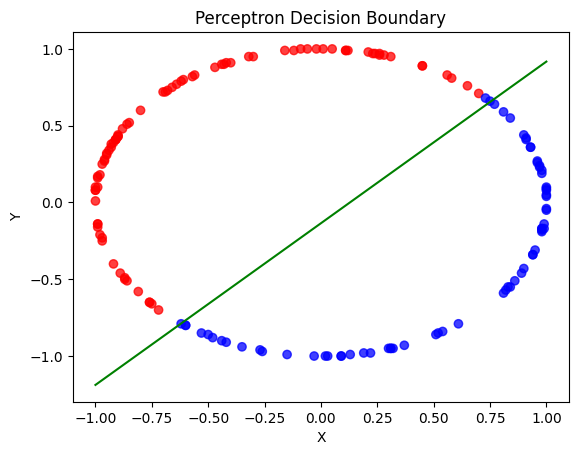

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read data from text file
def read_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # First two columns are x and y coordinates
    y = data[:, 2]   # Third column is the label
    return X, y

# Define Perceptron class with mistake tracking
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.mistakes = 0

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.mistakes = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Perceptron update rule
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]
                    self.mistakes += 1

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

    def get_weights(self):
        return self.weights

    def get_bias(self):
        return self.bias

    def get_mistakes(self):
        return self.mistakes

# Main script
file_path = '/content/two_circle.txt'
X, y = read_data(file_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Perceptron instance and train it on the training data
perceptron = Perceptron(learning_rate=0.1, epochs=1000)
perceptron.fit(X_train, y_train)

# Make predictions on the testing set
predictions = perceptron.predict(X_test)

# Calculate accuracy on the testing set
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: Calculate accuracy on the training set for comparison
train_predictions = perceptron.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Extract the final direction vector
weights = perceptron.get_weights()
bias = perceptron.get_bias()
print(f"Final direction vector (weights): {weights}")
print(f"Final direction vector (bias): {bias}")

# Count the number of mistakes
mistakes = perceptron.get_mistakes()
print(f"Number of mistakes made by the algorithm: {mistakes}")

# Compute the margin
distances = (y_train * (np.dot(X_train, weights) + bias)) / np.linalg.norm(weights)
margin = np.min(distances)
print(f"Margin achieved by the final direction vector: {margin}")

# Plot the decision boundary using the entire dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.75)
plt.title("Perceptron Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")

# Plot the line (decision boundary)
x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, color='green')
plt.show()
